# Data Loading and Label Mapping

This notebook demonstrates how to load the annotation data and map narrative and subnarrative labels to their corresponding IDs using the provided taxonomy and helper functions.

In [1]:
# Add the project root to sys.path so we can import from src
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Set the current working directory to the project root
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(ROOT_DIR)

In [2]:
import os
from src.data_management.label_parser import parse_json_for_narratives_subnarratives, create_label_mappings
from src.data_management.loaders import load_all_annotations_to_df, load_ids_to_df

In [3]:
print(os.getcwd())

/home/twoface/Documents/Passau/masterarbeit/hybrid-text-classification


In [3]:
# Define the path to the taxonomy JSON file
taxonomy_path = os.path.join('data', 'taxonomy.json')

# Parse narratives and subnarratives from the taxonomy
narratives, subnarratives = parse_json_for_narratives_subnarratives(taxonomy_path)

# Create label mappings
label_to_id, id_to_label, narrative_to_subnarrative_ids = create_label_mappings(narratives, subnarratives)

/tmp/ipykernel_1487/1563108344.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


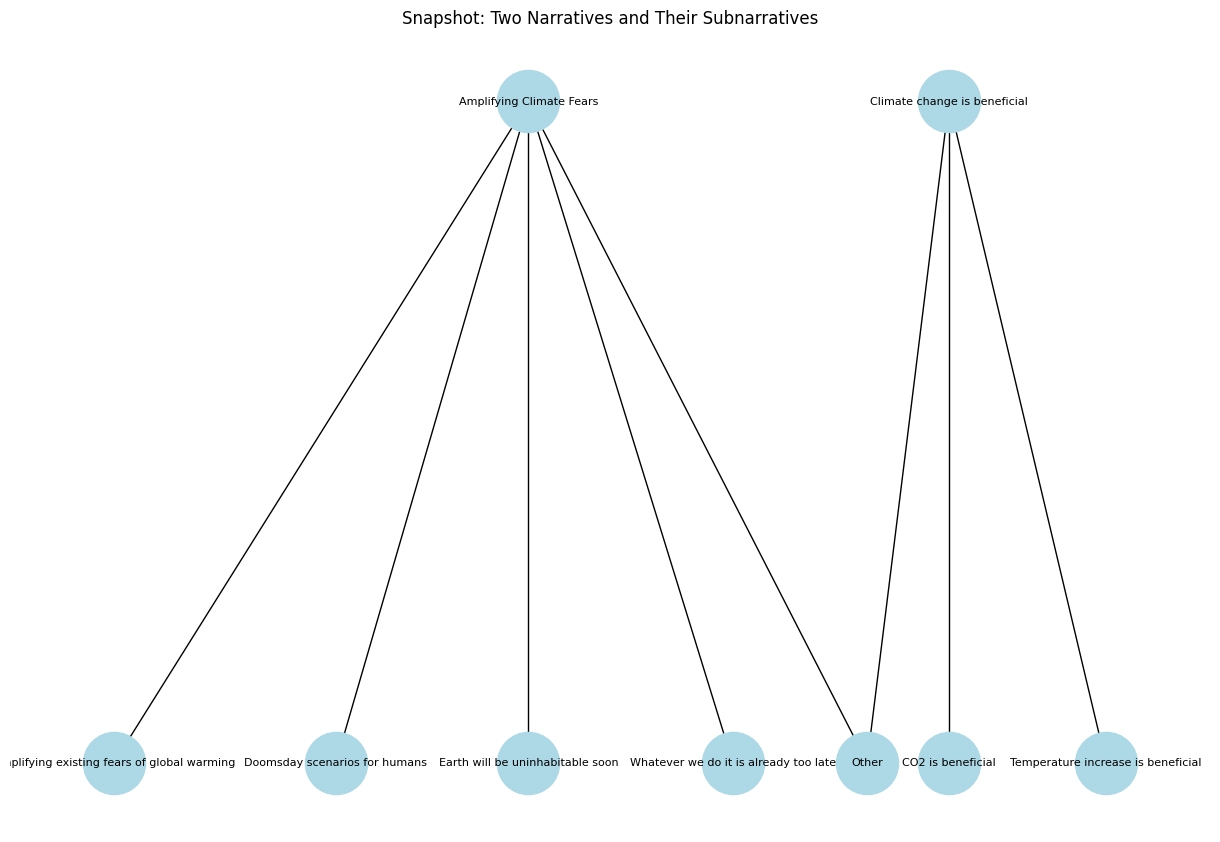

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for only two narratives and their subnarratives
G = nx.DiGraph()

# Select only the first two narratives
selected_narrative_ids = list(narrative_to_subnarrative_ids.keys())[:2]
for narrative_id in selected_narrative_ids:
    # Truncate narrative label to short name (remove prefix before colon, if any)
    narrative_label = id_to_label[narrative_id]
    short_narrative_label = narrative_label.split(":")[-1].strip() if ":" in narrative_label else narrative_label
    G.add_node(short_narrative_label)
    for sub_id in narrative_to_subnarrative_ids[narrative_id]:
        sub_label = id_to_label[sub_id]
        short_sub_label = sub_label.split(":")[-1].strip() if ":" in sub_label else sub_label
        G.add_node(short_sub_label)
        G.add_edge(short_narrative_label, short_sub_label)

# Draw the graph using a hierarchical layout
plt.figure(figsize=(12, 8))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False, node_size=2000, font_size=8, node_color='lightblue')
plt.title("Snapshot: Two Narratives and Their Subnarratives")
plt.tight_layout()
plt.show()

In [5]:
# Load all annotation data into a DataFrame
annotations_df = load_all_annotations_to_df()

# Display the first few rows
annotations_df.head()

,id,text,narratives,subnarratives,language
0,BG_670.txt,Опитът на колективния Запад да „обезкърви Руси...,[URW: Blaming the war on others rather than th...,[URW: Blaming the war on others rather than th...,BG
1,A7_URW_BG_4793.txt,"Цончо Ганев, “Възраждане”: Обещали сме на Укра...",[URW: Discrediting Ukraine],[URW: Discrediting Ukraine: Situation in Ukrai...,BG
2,BG_3245.txt,Подкрепата за Киев от страна на Запада вече не...,"[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: The We...",BG
3,A9_BG_5190.txt,"Дмитрий Медведев: НПО-та, спонсорирани от Соро...","[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: Other,...",BG
4,A9_BG_3379.txt,Британски дипломат обвини Запада за украинския...,"[URW: Discrediting the West, Diplomacy, URW: P...","[URW: Discrediting the West, Diplomacy: Other,...",BG


In [6]:
# Map narrative and subnarrative labels to their corresponding IDs
annotations_with_ids = load_ids_to_df(annotations_df, label_to_id)

# Display the first few rows with IDs
annotations_with_ids.head()

,id,text,narratives,subnarratives,narrative_ids,subnarrative_ids,language
0,BG_670.txt,Опитът на колективния Запад да „обезкърви Руси...,[URW: Blaming the war on others rather than th...,[URW: Blaming the war on others rather than th...,"[11, 12, 14]","[88, 70, 74, 86]",BG
1,A7_URW_BG_4793.txt,"Цончо Ганев, “Възраждане”: Обещали сме на Укра...",[URW: Discrediting Ukraine],[URW: Discrediting Ukraine: Situation in Ukrai...,[13],[81],BG
2,BG_3245.txt,Подкрепата за Киев от страна на Запада вече не...,"[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: The We...","[13, 14]","[81, 90, 87]",BG
3,A9_BG_5190.txt,"Дмитрий Медведев: НПО-та, спонсорирани от Соро...","[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: Other,...","[13, 14]","[84, 86]",BG
4,A9_BG_3379.txt,Британски дипломат обвини Запада за украинския...,"[URW: Discrediting the West, Diplomacy, URW: P...","[URW: Discrediting the West, Diplomacy: Other,...","[19, 14]","[86, 103]",BG


In [9]:
# Save the annotations_df DataFrame to a parquet file
output_path = os.path.join('data', 'processed', 'phase0_baseline.parquet')
annotations_df.to_parquet(output_path, index=False)